<a href="https://colab.research.google.com/github/polock11/supervised_and_unsupervised_learning/blob/main/supervised_learning_LogisticReg_4%2B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Topics:
* precision
* recall
* f_beta
* confusion matrix
* calssification report

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Churn.csv')

#enabling all columns in the output cell
pd.options.display.max_columns = df.shape[1]

df.sample(10)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
1821,123,39,270.4,245.1,108.9,15.4,1,no,no,yes,99,45.97,110,20.83,113,4.90,7,4.16,OH,408,396-6247
2644,76,0,179.2,222.9,188.2,12.4,0,no,no,no,85,30.46,66,18.95,113,8.47,2,3.35,AL,415,367-8156
3070,154,0,154.5,214.2,178.0,12.0,3,yes,no,no,122,26.27,71,18.21,105,8.01,2,3.24,MD,510,411-2977
663,152,0,197.1,130.1,78.1,7.4,3,no,no,no,126,33.51,76,11.06,100,3.51,4,2.00,VT,415,418-7846
1119,189,0,208.3,236.7,179.1,11.3,3,no,no,no,106,35.41,123,20.12,120,8.06,5,3.05,OK,415,383-2537
882,130,0,162.8,290.3,114.9,7.2,1,no,no,no,113,27.68,111,24.68,140,5.17,3,1.94,FL,415,343-9946
2698,145,0,175.8,274.3,226.6,12.4,1,no,no,no,89,29.89,119,23.32,69,10.20,4,3.35,MA,415,381-7003
1904,174,33,167.8,205.3,130.0,14.5,4,yes,no,yes,91,28.53,91,17.45,132,5.85,4,3.92,WA,408,352-6068
1755,80,15,159.3,170.6,141.2,11.9,1,no,yes,yes,110,27.08,120,14.50,82,6.35,5,3.21,MO,408,405-4420
1710,146,0,169.5,230.9,269.8,9.0,2,no,no,no,93,28.82,71,19.63,115,12.14,7,2.43,OH,415,358-3604


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [ ]:
obj_col = []

for i in df.columns:
    if df[i].dtypes == "O":
        obj_col.append(i)

k = df.columns[-3:]
print(k)
df = df.drop(k, axis = 1)
display(df.head())

Index(['State', 'Area_Code', 'Phone'], dtype='object')


,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73


In [ ]:
df['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [ ]:
df['Intl_Plan'].value_counts()

no     3010
yes     323
Name: Intl_Plan, dtype: int64

In [ ]:
df['Vmail_Plan'].value_counts()

no     2411
yes     922
Name: Vmail_Plan, dtype: int64

In [ ]:
#replacing no with 0 and yes with 1
df['Churn'] = df['Churn'].replace({'no':0, 'yes': 1})
df['Intl_Plan'] = df['Intl_Plan'].replace({'no':0, 'yes': 1})
df['Vmail_Plan'] = df['Vmail_Plan'].replace({'no':0, 'yes': 1})

df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73


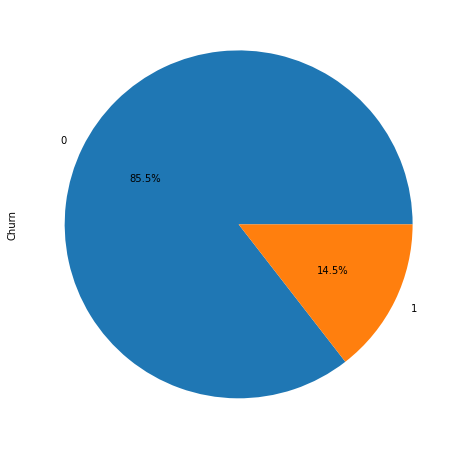

In [ ]:
plt.figure(figsize = (8,8))
df['Churn'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');


In [ ]:
#splitting X and y
X = df.drop("Churn", axis=1)
y = df[["Churn"]]


print(X.shape, y.shape)

(3333, 17) (3333, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42, stratify= y)

print("Shape of X_test = ", X_test.shape)
print("Shape of y_test = ", y_test.shape)

Shape of X_test =  (1000, 17)
Shape of y_test =  (1000, 1)


In [ ]:
model = LogisticRegression(max_iter=500)
model = model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
y_test['pred'] = y_pred

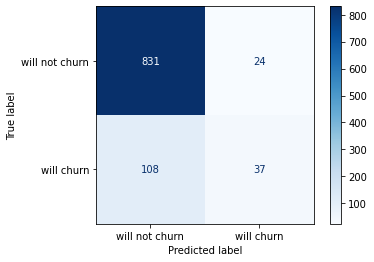

In [ ]:
plot_confusion_matrix(model, X_test, 
                      y_test['Churn'], 
                      display_labels = ["will not churn", "will churn"],
                      cmap = "Blues");

* **True Positive:** Actually positive and the model predicted positive
* **True Negative:** Actually negative and the model predicted negative
* **False Positive:** Actually negative and the model predicted positive
* **False Negative:** Actually positive and the model predicted negative

**Example:**
* **TP:** have cancer, prediction says have cancer
* **TN:** don't have cancer, prediction says don't have cancer
* **FP:** dont'have cancer, prediction says have cancer
* **FN:** have cancer, prediction says don't have cancer

In [ ]:
confusion_matrix_ = confusion_matrix(y_test['Churn'], y_pred)
print(confusion_matrix_)

[[831  24]
 [108  37]]


In [ ]:
TP = confusion_matrix_[1,1]
TN = confusion_matrix_[0,0]
FP = confusion_matrix_[0,1]
FN = confusion_matrix_[1,0]

print('TP: ',TP)
print('TN: ',TN)
print('FP: ',FP)
print('FN: ',FN)

TP:  37
TN:  831
FP:  24
FN:  108


**Precision:** out of total actual positive lables how many the model predicted correctly.
* focuses on the **False Positives**
* formula = **TP/(TP+FP)**
* if FP's are more important for the case try to improve the **precision**

**Recall:** out of total predicted positive lables how many the model predicted correctly.

* focuses on the **False Negatives**
* formula = **TP/(TP+FN)**
* if the FN's are more important for the case try to improve the **Recall**.

**F_beta Score:** when both FP's and FN's are important use this metrics.

In [ ]:
#Calculatiing a precision, recall and f1-score manually

precision_ = np.round(TP/(TP+FP), 2)

recall_ = np.round(TP/(TP+FN), 2)

f1_score_ = np.round(2*precision_*recall_/(recall_+precision_), 2)

print('precision: ',precision_)
print('recall: ',recall_)
print('f1_score: ',f1_score_)

precision:  0.61
recall:  0.26
f1_score:  0.36


In [ ]:
classification_report_ = classification_report(y_test["Churn"], y_pred)
print(classification_report_)

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       855
           1       0.61      0.26      0.36       145

    accuracy                           0.87      1000
   macro avg       0.75      0.61      0.64      1000
weighted avg       0.84      0.87      0.84      1000

